## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0  0.975589  0.631313  0.421835  0.316116 -0.677404  0.705642
1  1.239110 -0.948303 -0.463146  1.462269 -0.260039  0.674245
2 -1.292684  1.358506  1.012816 -1.287031  0.423355 -1.081797
3  0.426945  0.601200 -0.030991  1.616061  1.426738  2.053942
4  0.372113  1.342377  0.733011  0.847997 -0.014102  1.337994


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0071196	total: 56.7ms	remaining: 56.6s
1:	learn: 0.9987241	total: 57.3ms	remaining: 28.6s
2:	learn: 0.9879233	total: 57.9ms	remaining: 19.3s
3:	learn: 0.9765124	total: 58.5ms	remaining: 14.6s
4:	learn: 0.9687207	total: 58.9ms	remaining: 11.7s
5:	learn: 0.9604061	total: 59.4ms	remaining: 9.85s
6:	learn: 0.9485879	total: 60ms	remaining: 8.51s
7:	learn: 0.9397680	total: 60.6ms	remaining: 7.51s
8:	learn: 0.9309726	total: 61ms	remaining: 6.72s
9:	learn: 0.9215073	total: 61.5ms	remaining: 6.09s
10:	learn: 0.9104744	total: 62.1ms	remaining: 5.58s
11:	learn: 0.9011747	total: 62.7ms	remaining: 5.16s
12:	learn: 0.8929766	total: 63.3ms	remaining: 4.81s
13:	learn: 0.8847191	total: 63.8ms	remaining: 4.49s
14:	learn: 0.8774604	total: 64.2ms	remaining: 4.21s
15:	learn: 0.8688961	total: 64.7ms	remaining: 3.98s
16:	learn: 0.8618280	total: 65.1ms	remaining: 3.76s
17:	learn: 0.8546468	total: 65.5ms	remaining: 3.57s
18:	learn: 0.8477543	total: 66ms	remaining: 3.41

110:	learn: 0.3938461	total: 109ms	remaining: 875ms
111:	learn: 0.3905499	total: 110ms	remaining: 871ms
112:	learn: 0.3877958	total: 110ms	remaining: 866ms
113:	learn: 0.3847017	total: 111ms	remaining: 862ms
114:	learn: 0.3815945	total: 111ms	remaining: 857ms
115:	learn: 0.3791805	total: 112ms	remaining: 852ms
116:	learn: 0.3768845	total: 112ms	remaining: 849ms
117:	learn: 0.3746625	total: 113ms	remaining: 844ms
118:	learn: 0.3720284	total: 113ms	remaining: 840ms
119:	learn: 0.3690285	total: 114ms	remaining: 836ms
120:	learn: 0.3664452	total: 114ms	remaining: 831ms
121:	learn: 0.3639767	total: 115ms	remaining: 827ms
122:	learn: 0.3609269	total: 115ms	remaining: 823ms
123:	learn: 0.3580618	total: 116ms	remaining: 819ms
124:	learn: 0.3555675	total: 116ms	remaining: 815ms
125:	learn: 0.3529534	total: 117ms	remaining: 811ms
126:	learn: 0.3506984	total: 117ms	remaining: 807ms
127:	learn: 0.3478624	total: 118ms	remaining: 803ms
128:	learn: 0.3450168	total: 118ms	remaining: 799ms
129:	learn: 

271:	learn: 0.1328875	total: 186ms	remaining: 498ms
272:	learn: 0.1320302	total: 187ms	remaining: 498ms
273:	learn: 0.1312501	total: 188ms	remaining: 498ms
274:	learn: 0.1304565	total: 189ms	remaining: 497ms
275:	learn: 0.1296505	total: 189ms	remaining: 496ms
276:	learn: 0.1288864	total: 190ms	remaining: 495ms
277:	learn: 0.1280361	total: 190ms	remaining: 494ms
278:	learn: 0.1273262	total: 191ms	remaining: 492ms
279:	learn: 0.1265739	total: 191ms	remaining: 491ms
280:	learn: 0.1257714	total: 192ms	remaining: 490ms
281:	learn: 0.1250603	total: 192ms	remaining: 489ms
282:	learn: 0.1242857	total: 192ms	remaining: 488ms
283:	learn: 0.1235433	total: 193ms	remaining: 486ms
284:	learn: 0.1228175	total: 193ms	remaining: 485ms
285:	learn: 0.1220140	total: 194ms	remaining: 484ms
286:	learn: 0.1213333	total: 194ms	remaining: 483ms
287:	learn: 0.1206164	total: 195ms	remaining: 481ms
288:	learn: 0.1199000	total: 195ms	remaining: 480ms
289:	learn: 0.1191318	total: 196ms	remaining: 479ms
290:	learn: 

503:	learn: 0.0493754	total: 293ms	remaining: 288ms
504:	learn: 0.0490782	total: 293ms	remaining: 288ms
505:	learn: 0.0487448	total: 294ms	remaining: 287ms
506:	learn: 0.0485234	total: 294ms	remaining: 286ms
507:	learn: 0.0482991	total: 295ms	remaining: 285ms
508:	learn: 0.0480827	total: 295ms	remaining: 285ms
509:	learn: 0.0478632	total: 296ms	remaining: 284ms
510:	learn: 0.0476553	total: 296ms	remaining: 283ms
511:	learn: 0.0475563	total: 296ms	remaining: 283ms
512:	learn: 0.0473460	total: 297ms	remaining: 282ms
513:	learn: 0.0471246	total: 297ms	remaining: 281ms
514:	learn: 0.0468747	total: 298ms	remaining: 280ms
515:	learn: 0.0466709	total: 298ms	remaining: 280ms
516:	learn: 0.0464717	total: 299ms	remaining: 279ms
517:	learn: 0.0462686	total: 299ms	remaining: 279ms
518:	learn: 0.0460795	total: 300ms	remaining: 278ms
519:	learn: 0.0460414	total: 300ms	remaining: 277ms
520:	learn: 0.0458313	total: 301ms	remaining: 276ms
521:	learn: 0.0455236	total: 301ms	remaining: 276ms
522:	learn: 

626:	learn: 0.0271906	total: 351ms	remaining: 209ms
627:	learn: 0.0270254	total: 352ms	remaining: 209ms
628:	learn: 0.0268634	total: 353ms	remaining: 208ms
629:	learn: 0.0267578	total: 353ms	remaining: 207ms
630:	learn: 0.0266056	total: 353ms	remaining: 207ms
631:	learn: 0.0265075	total: 354ms	remaining: 206ms
632:	learn: 0.0263573	total: 354ms	remaining: 205ms
633:	learn: 0.0262617	total: 355ms	remaining: 205ms
634:	learn: 0.0261214	total: 355ms	remaining: 204ms
635:	learn: 0.0260058	total: 356ms	remaining: 204ms
636:	learn: 0.0258601	total: 356ms	remaining: 203ms
637:	learn: 0.0257565	total: 357ms	remaining: 202ms
638:	learn: 0.0255931	total: 357ms	remaining: 202ms
639:	learn: 0.0255309	total: 358ms	remaining: 201ms
640:	learn: 0.0254696	total: 358ms	remaining: 201ms
641:	learn: 0.0253791	total: 359ms	remaining: 200ms
642:	learn: 0.0253030	total: 359ms	remaining: 199ms
643:	learn: 0.0251688	total: 360ms	remaining: 199ms
644:	learn: 0.0250691	total: 360ms	remaining: 198ms
645:	learn: 

755:	learn: 0.0176943	total: 413ms	remaining: 133ms
756:	learn: 0.0176134	total: 413ms	remaining: 133ms
757:	learn: 0.0175571	total: 414ms	remaining: 132ms
758:	learn: 0.0174932	total: 414ms	remaining: 131ms
759:	learn: 0.0174797	total: 415ms	remaining: 131ms
760:	learn: 0.0174247	total: 415ms	remaining: 130ms
761:	learn: 0.0173712	total: 416ms	remaining: 130ms
762:	learn: 0.0173579	total: 416ms	remaining: 129ms
763:	learn: 0.0173475	total: 417ms	remaining: 129ms
764:	learn: 0.0172941	total: 417ms	remaining: 128ms
765:	learn: 0.0172838	total: 418ms	remaining: 128ms
766:	learn: 0.0172709	total: 418ms	remaining: 127ms
767:	learn: 0.0172608	total: 419ms	remaining: 127ms
768:	learn: 0.0172003	total: 419ms	remaining: 126ms
769:	learn: 0.0171903	total: 420ms	remaining: 125ms
770:	learn: 0.0171369	total: 420ms	remaining: 125ms
771:	learn: 0.0170861	total: 421ms	remaining: 124ms
772:	learn: 0.0170736	total: 421ms	remaining: 124ms
773:	learn: 0.0170638	total: 422ms	remaining: 123ms
774:	learn: 

943:	learn: 0.0110043	total: 504ms	remaining: 29.9ms
944:	learn: 0.0109867	total: 504ms	remaining: 29.3ms
945:	learn: 0.0109638	total: 505ms	remaining: 28.8ms
946:	learn: 0.0109258	total: 505ms	remaining: 28.3ms
947:	learn: 0.0109033	total: 506ms	remaining: 27.7ms
948:	learn: 0.0108776	total: 506ms	remaining: 27.2ms
949:	learn: 0.0108554	total: 506ms	remaining: 26.7ms
950:	learn: 0.0108380	total: 507ms	remaining: 26.1ms
951:	learn: 0.0108165	total: 507ms	remaining: 25.6ms
952:	learn: 0.0107913	total: 508ms	remaining: 25ms
953:	learn: 0.0107742	total: 508ms	remaining: 24.5ms
954:	learn: 0.0107523	total: 509ms	remaining: 24ms
955:	learn: 0.0107354	total: 510ms	remaining: 23.4ms
956:	learn: 0.0107138	total: 510ms	remaining: 22.9ms
957:	learn: 0.0106970	total: 510ms	remaining: 22.4ms
958:	learn: 0.0106726	total: 511ms	remaining: 21.8ms
959:	learn: 0.0106553	total: 511ms	remaining: 21.3ms
960:	learn: 0.0106339	total: 512ms	remaining: 20.8ms
961:	learn: 0.0106119	total: 512ms	remaining: 20.2

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

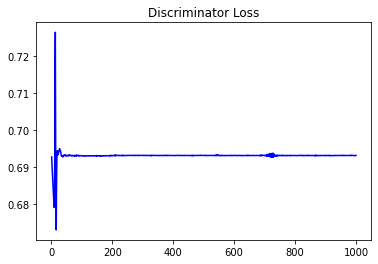

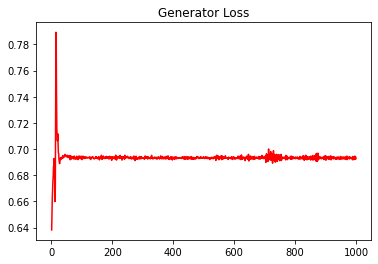

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.11843987539773712


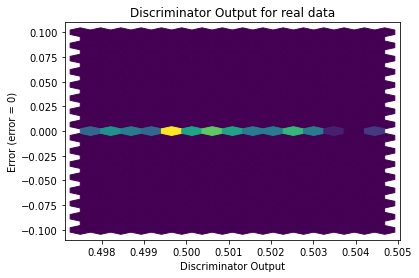

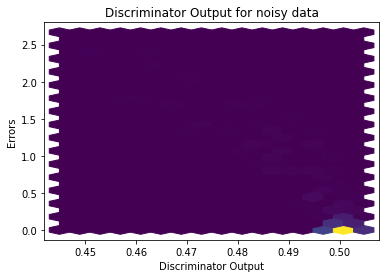

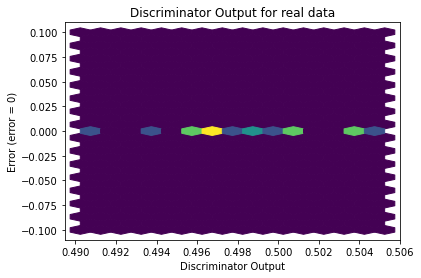

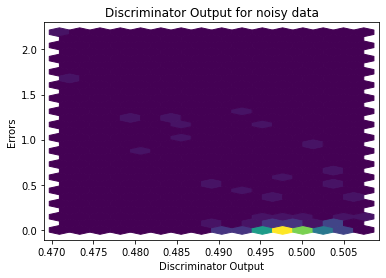

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


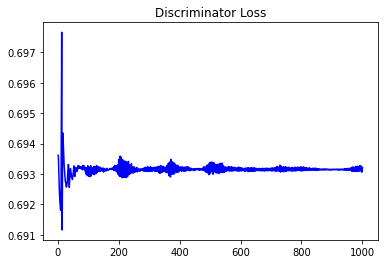

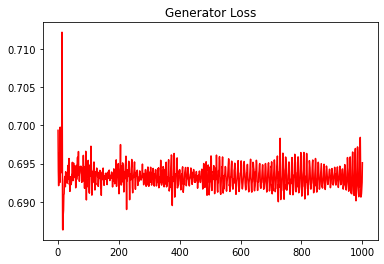

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.117865824386699


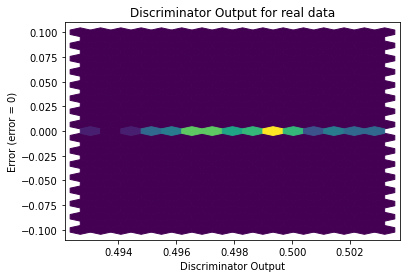

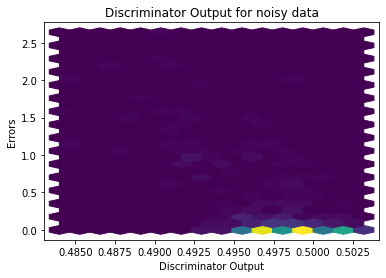

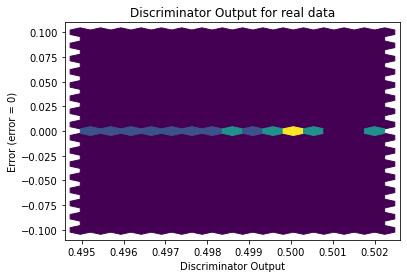

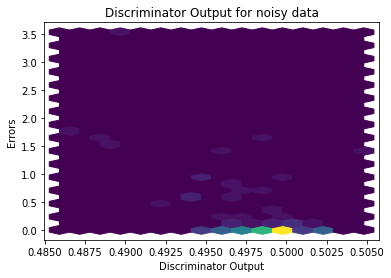

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0333]], requires_grad=True)
